In [6]:
import pyesg

# instantiate a new model with the required parameters
model = pyesg.GeometricBrownianMotion(mu=0.10, sigma=0.2)

# prepare the arguments to generate scenarios. Here we'll
# generate 10,000 scenarios with 252 daily (trading day)
# time steps, for a one-year projection in total.
x0 = 100.0           # the start value of our process
dt = 1/252           # the length of each timestep in years
n_scenarios = 1000  # the number of scenarios to generate
n_steps = 252 * 40       # the number of time steps per scenario
random_state = 300   # optional random_state for reproducibility

# now we generate the scenarios; this outputs a numpy array. It will
# have shape (10000, 253), which represents (scenarios, timesteps).
# There are 253 timesteps because the initial value is included to start
results = model.scenarios(x0, dt, n_scenarios, n_steps, random_state)


In [11]:
import pandas as pd

df = pd.DataFrame(results)



# df.to_csv('interest_scenarios.csv', index = False)

(1000, 10081)


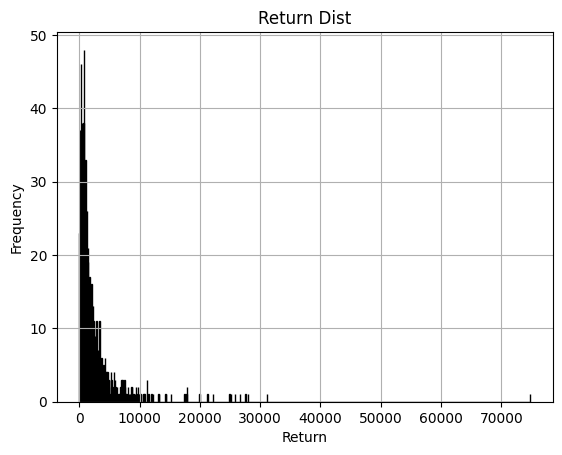

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot a histogram of the 'Age' column
df.iloc[:, 8071].hist(bins=1000, edgecolor='black')

plt.title('Return Dist')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()


In [3]:
import numpy as np
import pandas as pd
import pyesg

periods_in_a_year = 12
years = 2
current_year = 2023
target_year = 2055

starting_age = 33
retirement_age = 35
starting_value = 180000
salary = 190000
salary_growth = .045
fund_pct = .15
inflation = .022
stock_pct_s = .80
bond_pct_s = 1 - stock_pct_s
stock_pct_e = .2
bond_pct_e = 1 - stock_pct_e

fund_pct_per_period = fund_pct / periods_in_a_year
salary_growth_per_period = (1+salary_growth)**(1/periods_in_a_year)-1
fund_pct_per_period = (1+fund_pct)**(1/periods_in_a_year)-1

stock_alloc_array = np.ones(periods_in_a_year * years + 1) * (stock_pct_e - stock_pct_s) / (retirement_age - starting_age) / periods_in_a_year
stock_alloc_array[0] = stock_pct_s
stock_alloc_array = np.cumsum(stock_alloc_array)

age_array = np.ones(periods_in_a_year * years + 1) / periods_in_a_year
age_array[0] = starting_age
age_array = np.cumsum(age_array) 

salary_growth_array = np.ones(periods_in_a_year * years) * (1+salary_growth_per_period)
salary_growth_array[0] = salary
salary_array = np.cumprod(salary_growth_array)
invest_array = salary_array * fund_pct

# instantiate a new model with the required parameters
stock_model = pyesg.GeometricBrownianMotion(mu=0.10, sigma=0.15)
bond_model = pyesg.GeometricBrownianMotion(mu=0.06, sigma=0.05)

x0 = 100.0                          # the start value of our process
dt = 1/periods_in_a_year            # the length of each timestep in years
n_scenarios = 2                     # the number of scenarios to generate
n_steps = periods_in_a_year * years # the number of time steps per scenario
random_state = 259                  # optional random_state for reproducibility

s_model_results = stock_model.scenarios(x0, dt, n_scenarios, n_steps, random_state)
b_model_results = bond_model.scenarios(x0, dt, n_scenarios, n_steps, random_state)

stock_return = s_model_results[:, 1:] / s_model_results[:, :-1]
bond_return = b_model_results[:, 1:] / b_model_results[:, :-1]

stock_array = np.insert(stock_return, 0, starting_value * stock_pct, axis=1)
bond_array = np.insert(bond_return, 0, starting_value * bond_pct, axis=1)

for s, b in zip(stock_array, bond_array):
    for i in range(1, len(s)):
        s[i] = s[i-1] * s[i]
        b[i] = b[i-1] * b[i]
        total_fund = s[i] + b[i] + invest_array[i-1]/periods_in_a_year
        s[i] = total_fund * stock_pct
        b[i] = total_fund * bond_pct

stock_array_df = pd.DataFrame(stock_array)
bond_array_df = pd.DataFrame(bond_array)
stock_return_df = pd.DataFrame(stock_return)
bond_return_df = pd.DataFrame(bond_return)
salary_array_df = pd.DataFrame(salary_array)
invest_array_df = pd.DataFrame(invest_array)
age_array_df = pd.DataFrame(age_array)

with pd.ExcelWriter('retirement_calc.xlsx') as writer:
    stock_array_df.to_excel(writer, sheet_name='stock_array')
    bond_array_df.to_excel(writer, sheet_name='bond_array')
    stock_return_df.to_excel(writer, sheet_name='stock_return')
    bond_return_df.to_excel(writer, sheet_name='bond_return')
    # index_return_df.to_excel(writer, sheet_name='index')
    # salary_array_df.to_excel(writer, sheet_name='salary')
    invest_array_df.to_excel(writer, sheet_name='invest')
    # age_array_df.to_excel(writer, sheet_name='age')



In [50]:
for i in range(3):
    print(i)



0
1
2
